<a href="https://colab.research.google.com/github/econ105/AI/blob/main/Python/Top_10_performance_stock_in_Hong_Kong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-422186352.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  10 of 10 completed


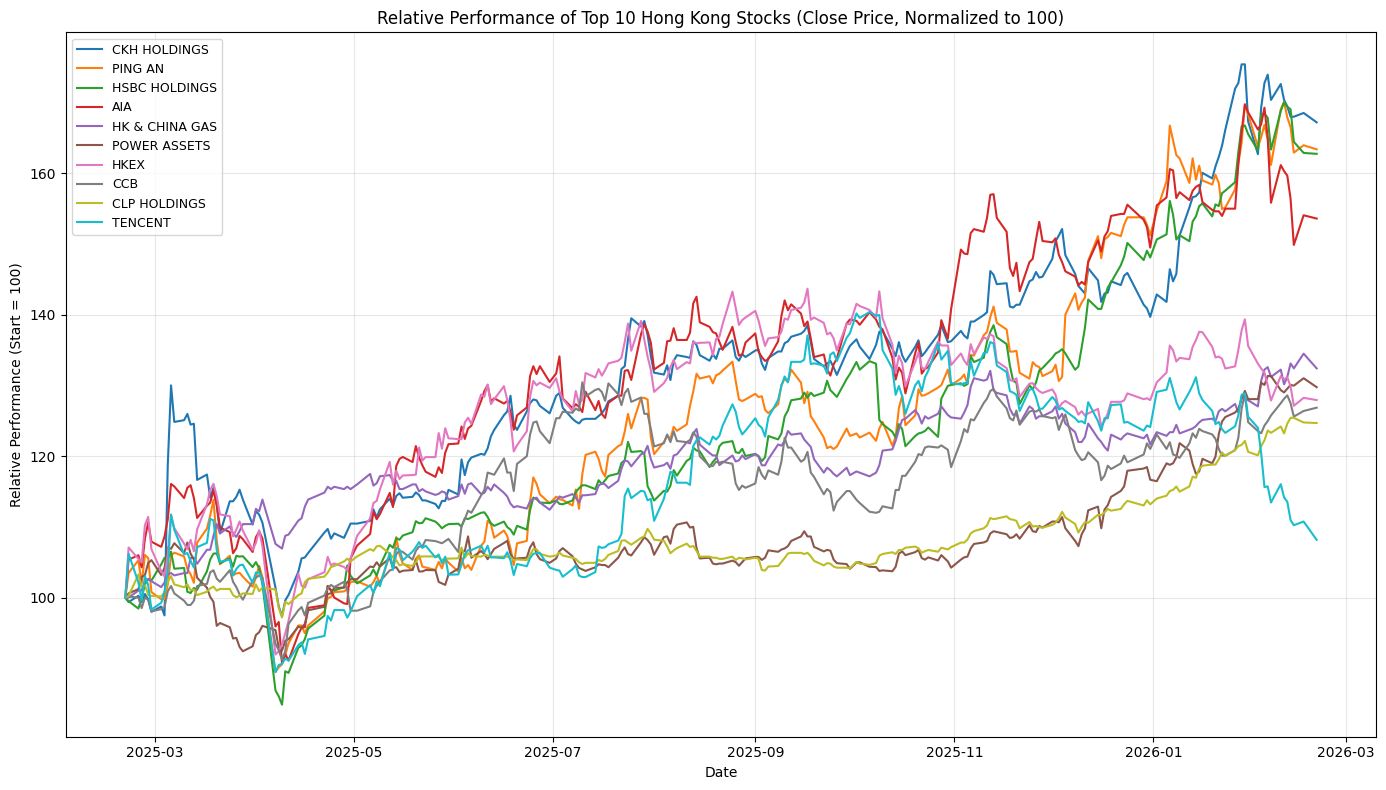

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = [
    "0005.HK", "0001.HK", "0002.HK", "0003.HK", "0006.HK",
    "0700.HK", "0939.HK", "1299.HK", "0388.HK", "2318.HK",
    # ... add more HK tickers here ...
]

# Map ticker -> company name
name_map = {}
for t in tickers:
    info = yf.Ticker(t).info  # has shortName/longName when available [web:21][web:23]
    name = info.get("shortName") or info.get("longName") or t
    name_map[t] = name

data = yf.download(
    tickers,
    period="1y",
    interval="1d"
)["Close"]  # [web:25][web:36]

data = data.dropna(axis=1, how="all")

first_prices = data.ffill().bfill().iloc[0]
last_prices = data.ffill().bfill().iloc[-1]
total_return = (last_prices / first_prices) - 1

# Top 10 instead of top 100
top_10 = total_return.sort_values(ascending=False).head(10).index
top_data = data[top_10].ffill().bfill()
rel_perf = top_data.divide(top_data.iloc[0]) * 100

plt.figure(figsize=(14, 8))
for col in rel_perf.columns:
    label_name = name_map.get(col, col)
    plt.plot(rel_perf.index, rel_perf[col], linewidth=1.5, label=label_name)

plt.title("Relative Performance of Top 10 Hong Kong Stocks (Close Price, Normalized to 100)")  # [web:34][web:39]
plt.xlabel("Date")
plt.ylabel("Relative Performance (Start = 100)")
plt.grid(True, alpha=0.3)
plt.legend(loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()
